## Dependencies

In [60]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Import and Prep Data

In [2]:
# Player data from CSV
stats = pd.read_csv("../resources/game_skater_stats.csv")
stats.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce'],
      dtype='object')

In [3]:
# Get TOI in minutes column
stats["TOI_min"] = stats["timeOnIce"]/60
stats["weighted_score"] = stats["goals"]*4\
    + stats["assists"]*3\
    + stats["shots"]*2\
    + stats["hits"]\
    + stats["takeaways"]\
    + stats["blocked"]\
    + stats["faceOffWins"]\
    - stats["penaltyMinutes"]*2\
    - stats["giveaways"]*2

In [45]:
# Group player ids to get total player stats
player_stats_avg = stats.groupby("player_id").mean().fillna(0)
player_stats_sum = stats.groupby("player_id").sum()

## Avg-TOI vs. Avg-Assists

In [103]:
# Establish X,y
TOI_A = np.array(player_stats_avg[["TOI_min","assists"]])

In [109]:
# Standardize the columns
scaler = StandardScaler().fit(TOI_A)
TOI_A_scaled = scaler.transform(TOI_A)

In [116]:
# Create kmeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(TOI_A_scaled)
predicted_clusters = kmeans.predict(TOI_A_scaled)

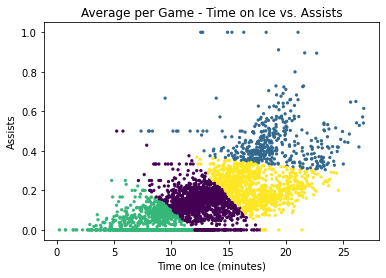

In [117]:
# Plot Clusters
plt.scatter(TOI_A[:,0], TOI_A[:,1], c=predicted_clusters, s=5, cmap="viridis")
plt.title("Average per Game - Time on Ice vs. Assists")
plt.xlabel("Time on Ice (minutes)")
plt.ylabel("Assists")
plt.show()

## TOI vs. Shots

In [123]:
# Format array for scatter plotting 
TOI_S = np.array(player_stats_avg[["TOI_min","shots"]])

In [124]:
# Standardize the columns
scaler = StandardScaler().fit(TOI_S)
TOI_S_scaled = scaler.transform(TOI_S)

In [125]:
# Create kmeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(TOI_S_scaled)
predicted_clusters = kmeans.predict(TOI_S_scaled)

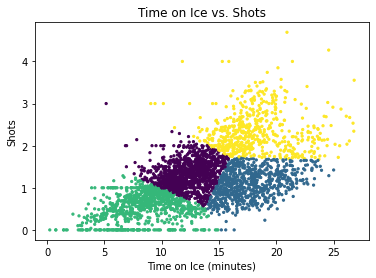

In [126]:
# Plot Clusters
plt.scatter(TOI_S[:,0], TOI_S[:,1], c=predicted_clusters, s=5, cmap="viridis")
plt.title("Time on Ice vs. Shots")
plt.xlabel("Time on Ice (minutes)") ### Make this hours?
plt.ylabel("Shots")
plt.show()

## TOI vs. Hits

In [127]:
# Format array for scatter plotting 
TOI_H = np.array(player_stats_avg[["TOI_min","hits"]])

In [128]:
# Standardize the columns
scaler = StandardScaler().fit(TOI_H)
TOI_H_scaled = scaler.transform(TOI_H)

In [129]:
# Create kmeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(TOI_H_scaled)
predicted_clusters = kmeans.predict(TOI_H_scaled)

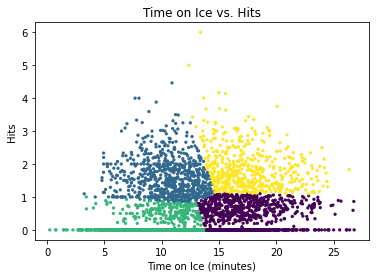

In [130]:
# Plot Clusters
plt.scatter(TOI_H[:,0], TOI_H[:,1], c=predicted_clusters, s=5, cmap="viridis")
plt.title("Time on Ice vs. Hits")
plt.xlabel("Time on Ice (minutes)") ### Make this hours?
plt.ylabel("Hits")
plt.show()

## Shots vs. Goals

In [141]:
# Format array for scatter plotting 
S_G = np.array(player_stats_avg[["shots","goals"]])

In [142]:
# Standardize the columns
scaler = StandardScaler().fit(S_G)
S_G_scaled = scaler.transform(S_G)

In [143]:
# Create kmeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(S_G_scaled)
predicted_clusters = kmeans.predict(S_G_scaled)

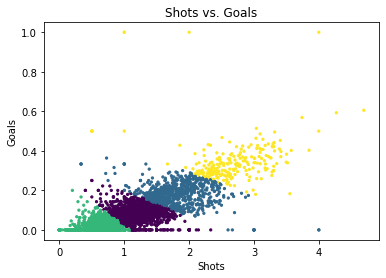

In [144]:
# Plot Clusters
plt.scatter(S_G[:,0], S_G[:,1], c=predicted_clusters, s=5, cmap="viridis")
plt.title("Shots vs. Goals")
plt.xlabel("Shots")
plt.ylabel("Goals")
plt.show()

## Goals vs. Assists

In [145]:
# Format array for scatter plotting 
G_A = np.array(player_stats_avg[["goals","assists"]])

In [146]:
# Standardize the columns
scaler = StandardScaler().fit(G_A)
G_A_scaled = scaler.transform(G_A)

In [147]:
# Create kmeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(G_A_scaled)
predicted_clusters = kmeans.predict(G_A_scaled)

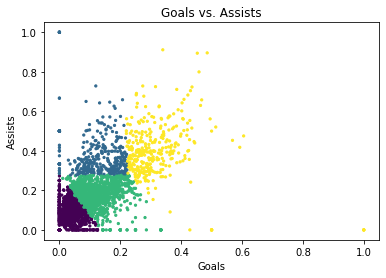

In [148]:
# Plot Clusters
plt.scatter(G_A[:,0], G_A[:,1], c=predicted_clusters, s=5, cmap="viridis")
plt.title("Goals vs. Assists")
plt.xlabel("Goals")
plt.ylabel("Assists")
plt.show()

## Shots vs. Blocked Shots

In [149]:
# Format array for scatter plotting 
S_BS = np.array(player_stats_avg[["shots","blocked"]])

In [150]:
# Standardize the columns
scaler = StandardScaler().fit(S_BS)
S_BS_scaled = scaler.transform(S_BS)

In [151]:
# Create kmeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(S_BS_scaled)
predicted_clusters = kmeans.predict(S_BS_scaled)

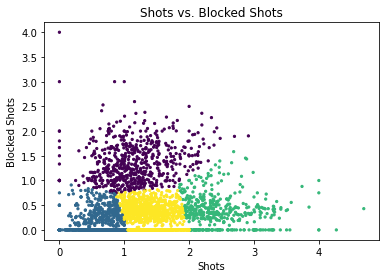

In [152]:
# Plot Clusters
plt.scatter(S_BS[:,0], S_BS[:,1], c=predicted_clusters, s=5, cmap="viridis")
plt.title("Shots vs. Blocked Shots")
plt.xlabel("Shots")
plt.ylabel("Blocked Shots")
plt.show()

## Hits vs. Penalty Minutes

In [153]:
# Format array for scatter plotting 
H_PIM = np.array(player_stats_avg[["hits","penaltyMinutes"]])

In [154]:
# Standardize the columns
scaler = StandardScaler().fit(H_PIM)
H_PIM_scaled = scaler.transform(H_PIM)

In [155]:
# Create kmeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(H_PIM_scaled)
predicted_clusters = kmeans.predict(H_PIM_scaled)

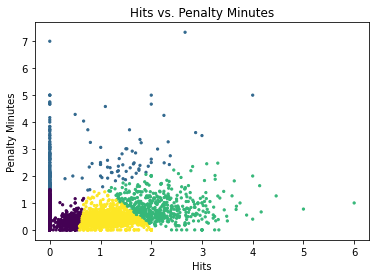

In [156]:
# Plot Clusters
plt.scatter(H_PIM[:,0], H_PIM[:,1], c=predicted_clusters, s=5, cmap="viridis")
plt.title("Hits vs. Penalty Minutes")
plt.xlabel("Hits")
plt.ylabel("Penalty Minutes")
plt.show()

## TOI vs. Weighted Score

In [157]:
# Format array for scatter plotting 
TOI_WS = np.array(player_stats_avg[["timeOnIce","weighted_score"]])

In [158]:
# Standardize the columns
scaler = StandardScaler().fit(TOI_WS)
TOI_WS_scaled = scaler.transform(TOI_WS)

In [159]:
# Create kmeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(TOI_WS_scaled)
predicted_clusters = kmeans.predict(TOI_WS_scaled)

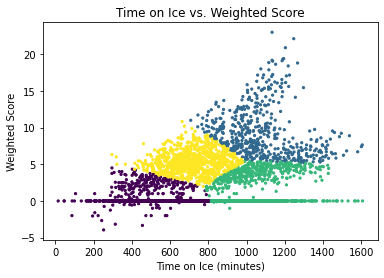

In [160]:
# Plot Clusters
plt.scatter(TOI_WS[:,0], TOI_WS[:,1], c=predicted_clusters, s=5, cmap="viridis")
plt.title("Time on Ice vs. Weighted Score")
plt.xlabel("Time on Ice (minutes)")
plt.ylabel("Weighted Score")
plt.show()